In [29]:
import os
import sys
import joblib

os.chdir("..")
sys.path.append(r"D:\GitHub\GNHS\src")

In [30]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from utils.utils import feature_label_split
import shap
shap.initjs()
pd.set_option("display.max_columns", None)

In [3]:
root_dir = Path(r"D:\GitHub\GNHS").resolve()
data_mets = root_dir / "data/transformed_data/2022/mets"
results_mets = root_dir / "results/2022/mets/"

mets_prot_only_baseline = data_mets / "mets_protein_baseline.csv"
mets_prot_only_perspective = data_mets / "mets_protein_perspective.csv"
mets_prot_only_result = results_mets / "protein/true/no_sampling/seed_20"

mets_clinic_only_baseline = data_mets / "mets_clinic_baseline.csv"
mets_clinic_only_perspective = data_mets / "mets_clinic_perspective.csv"
mets_clinic_only_result = results_mets / "clinic/true/no_sampling/seed_20"

mets_combined_baseline = data_mets / "mets_combined_baseline.csv"
mets_combined_perspective = data_mets / "mets_combined_perspective.csv"
mets_combined_result = results_mets / "combined/true/no_sampling/seed_20"


In [4]:
# analysis of prot only model 
# load data
df_prot_only_baseline = pd.read_csv(mets_prot_only_baseline, index_col=0).fillna(0)
df_prot_only_perspective = pd.read_csv(mets_prot_only_perspective, index_col=0).fillna(0)
print(df_prot_only_baseline.shape, df_prot_only_perspective.shape)

# load features
prot_only_features = pd.read_csv(mets_prot_only_result /"params/best_features.csv").columns.to_list()
print(prot_only_features)

# load model
with open(mets_prot_only_result/"params/best_model.pkl", "rb") as clf:
    prot_clf = joblib.load(clf)
print(prot_clf)

(1158, 294) (324, 289)
['A6NNL5_C15orf61', 'O75882_ATRN', 'P00740_F9', 'P01008_SERPINC1', 'P01009_SERPINA1', 'P01042_KNG1', 'P01824_IGHV4.39', 'P02647_APOA1', 'P02765_AHSG', 'P04004_VTN', 'P04114_APOB', 'P04278_SHBG', 'P05090_APOD', 'P05155_SERPING1', 'P05156_CFI', 'P08603_CFH', 'P10909_CLU', 'P18428_LBP', 'P49750_YLPM1', 'Q13790_APOF', 'Q460N5_PARP14']
LGBMClassifier(colsample_bytree=0.6676678451128657,
               learning_rate=0.1420934216672545, max_depth=2,
               min_child_weight=21.002097870925255,
               min_split_gain=0.8990285179329186, n_estimators=928,
               num_leaves=6, random_state=20, reg_alpha=0.6339533797792509,
               reg_lambda=0.6032106363549959,
               scale_pos_weight=1.5514286314674341, silent='warn',
               subsample=0.7714016727276465)


Trying to unpickle estimator LabelEncoder from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations


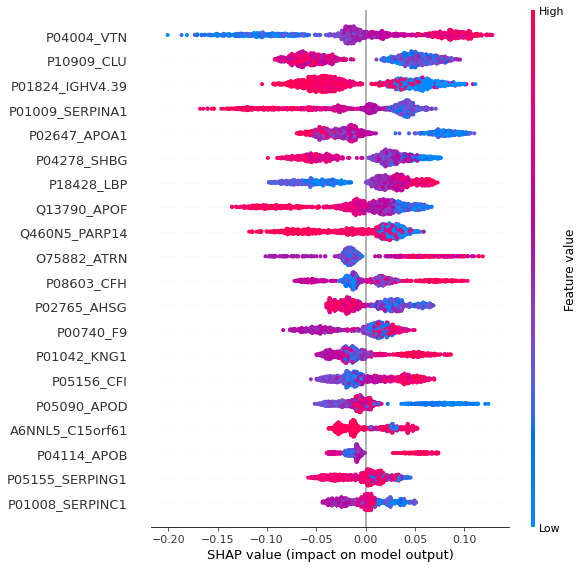

In [5]:
explainer = shap.TreeExplainer(model=prot_clf, data=df_prot_only_baseline[prot_only_features], model_output="probability")
shap_values = explainer.shap_values(X=df_prot_only_baseline[prot_only_features], y=df_prot_only_baseline["label"])
shap.summary_plot(shap_values, df_prot_only_baseline[prot_only_features], show=False)
plt.savefig(results_mets/"prot_only_shap_sumary_baseline.pdf", bbox_inches='tight', dpi=100)

In [6]:
explainer = shap.TreeExplainer(model=prot_clf, data=df_prot_only_perspective[prot_only_features], model_output="probability")
shap_values = explainer.shap_values(X=df_prot_only_perspective[prot_only_features], y=df_prot_only_perspective["label"])
shap.summary_plot(shap_values, df_prot_only_perspective[prot_only_features], show=False)
plt.savefig(results_mets/"prot_only_shap_sumary_perspective.pdf", bbox_inches='tight', dpi=100)

In [7]:
# analysis of clinic only model 
# load data
df_clinic_only_baseline = pd.read_csv(mets_clinic_only_baseline, index_col=0).fillna(0)
df_clinic_only_perspective = pd.read_csv(mets_clinic_only_perspective, index_col=0).fillna(0)
print(df_clinic_only_baseline.shape, df_clinic_only_perspective.shape)

# load features
clinic_only_features = pd.read_csv(mets_clinic_only_result /"params/best_features.csv").columns.to_list()
print(clinic_only_features)

# load model
with open(mets_clinic_only_result/"params/best_model.pkl", "rb") as clf:
    clinic_clf = joblib.load(clf)
print(clinic_clf)

(1158, 12) (324, 12)
['age', 'sex', 'BMI', 'wc', 'Glu', 'TG', 'HDL', 'SBP']
LGBMClassifier(colsample_bytree=0.5505911920335163,
               learning_rate=0.2565950155347486, max_depth=2,
               min_child_weight=23.290770767050688,
               min_split_gain=0.29555263078039196, n_estimators=842,
               num_leaves=2, random_state=20, reg_alpha=0.1964782972582947,
               reg_lambda=0.8099009638152318,
               scale_pos_weight=1.9493965900764345, silent='warn',
               subsample=0.7714016727276465)


Trying to unpickle estimator LabelEncoder from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations


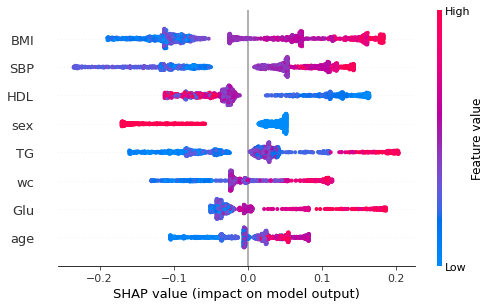

In [8]:
explainer = shap.TreeExplainer(model=clinic_clf, data=df_clinic_only_baseline[clinic_only_features], model_output="probability" )
shap_values = explainer.shap_values(X=df_clinic_only_baseline[clinic_only_features], y=df_clinic_only_baseline["label"])
shap.summary_plot(shap_values, df_clinic_only_baseline[clinic_only_features], show=False)
plt.savefig(results_mets/"clinic_only_shap_sumary_baseline.pdf", bbox_inches='tight', dpi=100)

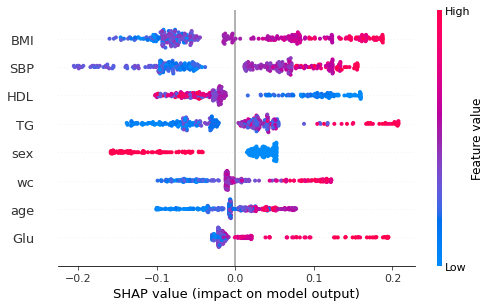

In [9]:
explainer = shap.TreeExplainer(model=clinic_clf, data=df_clinic_only_perspective[clinic_only_features], model_output="probability" )
shap_values = explainer.shap_values(X=df_clinic_only_perspective[clinic_only_features], y=df_clinic_only_perspective["label"])
shap.summary_plot(shap_values, df_clinic_only_perspective[clinic_only_features], show=False)
plt.savefig(results_mets/"clinic_only_shap_sumary_perspective.pdf", bbox_inches='tight', dpi=100)

In [10]:
# analysis of clinic only model 
# load data
df_combined_baseline = pd.read_csv(mets_combined_baseline, index_col=0).fillna(0)
df_combined_perspective = pd.read_csv(mets_combined_perspective, index_col=0).fillna(0)
print(df_combined_baseline.shape, df_combined_perspective.shape)

# load features
combined_features = pd.read_csv(mets_combined_result /"params/best_features.csv").columns.to_list()
print(combined_features)

# load model
with open(mets_combined_result/"params/best_model.pkl", "rb") as clf:
    combined_clf = joblib.load(clf)
print(combined_clf)

# combined dataset
df_combined_baseline["cohort"] = "baseline"
df_combined_perspective["cohort"] = "perspective"
df_combined_base_persp = pd.concat((df_combined_baseline[combined_features + ["sex", "label"]], df_combined_perspective[combined_features + ["sex", "label"]]), axis=0)
df_combined_base_persp

(1158, 305) (324, 300)
['age', 'BMI', 'wc', 'Glu', 'TG', 'HDL', 'SBP', 'P00740_F9', 'P01009_SERPINA1', 'P01042_KNG1', 'P01824_IGHV4.39', 'P02647_APOA1', 'P04004_VTN']
LGBMClassifier(colsample_bytree=0.9277721693078128,
               learning_rate=0.02390037882915843, max_depth=2,
               min_child_weight=23.290770767050688,
               min_split_gain=0.8990285179329186, n_estimators=928,
               num_leaves=2, random_state=20, reg_alpha=0.1964782972582947,
               reg_lambda=0.8099009638152318,
               scale_pos_weight=1.9493965900764345, silent='warn',
               subsample=0.8107444496299683)


Trying to unpickle estimator LabelEncoder from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations


age        BMI    wc  Glu    TG   HDL    SBP  P00740_F9  \
NL1001  54.694045  23.936062  80.0  5.0  2.56  1.47  125.0   4.104169   
NL1002  56.807666  21.357796  78.0  5.1  0.85  1.54  110.0   4.729357   
NL1006  52.443532  20.829996  70.0  4.7  0.63  1.99  130.0   4.171095   
NL1010  52.413415  19.382145  68.0  4.1  0.43  1.78  120.0   4.360055   
NL1011  51.134839  25.390625  84.0  4.9  1.42  1.53  138.0   4.593240   
...           ...        ...   ...  ...   ...   ...    ...        ...   
NL892   55.455168  17.799929  63.0  4.6  1.09  2.67  160.5   4.844145   
NL918   52.314853  20.796730  80.0  4.5  1.88  1.62  114.0   5.067490   
NL951   56.109514  25.847769  80.5  4.3  0.76  1.78  152.0   4.913246   
NL965   68.906229  23.597004  83.5  4.1  0.87  1.42  130.0   4.880639   
NL979   52.457221  25.631168  77.5  5.6  1.70  1.62  122.0   5.233094   

        P01009_SERPINA1  P01042_KNG1  P01824_IGHV4.39  P02647_APOA1  \
NL1001        11.939217     9.568656         6.843092     12.601251   
NL1002        12.258940     9.327952         7.127386     12.725300   
NL1006        12.223925     9.544291         6.663672     12.873510   
NL1010        12.076527     9.542016         6.252889     12.586679   
NL1011        11.601376     9.651097         7.184300     12.737304   
...                 ...          ...              ...           ...   
NL892         11.914195     9.590714         0.000000     12.646610   
NL918         11.998217     9.673486         6.564875     12.506515   
NL951         11.459795     9.468052         7.076901     12.457535   
NL965         11.951735     9.557997         6.973226     12.573463   
NL979         11.404290     9.624302         6.941928     12.348452   

        P04004_VTN  sex  label  
NL1001    9.300762    0    1.0  
NL1002    9.177761    1    0.0  
NL1006    8.874895    0    0.0  
NL1010    9.195441    0    0.0  
NL1011    9.704744    0    1.0  
...            ...  ...    ...  
NL892     9.055898    0    0.0  
NL918     9.005982    1    0.0  
NL951     8.793693    0    0.0  
NL965     8.892731    1    0.0  
NL979     9.308924    0    1.0  

[1482 rows x 15 columns]

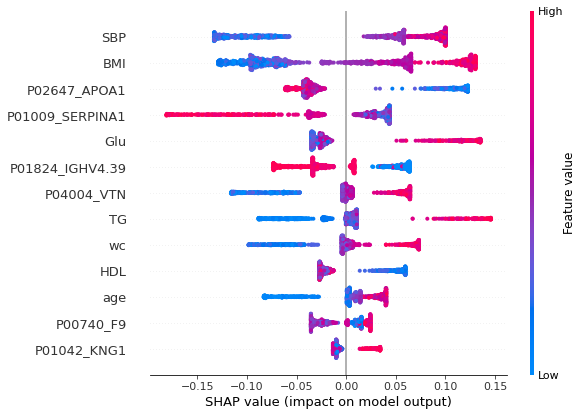

In [11]:
explainer = shap.TreeExplainer(model=combined_clf, data=df_combined_baseline[combined_features], model_output="probability" )
shap_values = explainer.shap_values(X=df_combined_baseline[combined_features], y=df_combined_baseline["label"])
shap.summary_plot(shap_values, df_combined_baseline[combined_features], show=False)
plt.savefig(results_mets/"combined_shap_sumary_baseline.pdf", bbox_inches='tight', dpi=100)

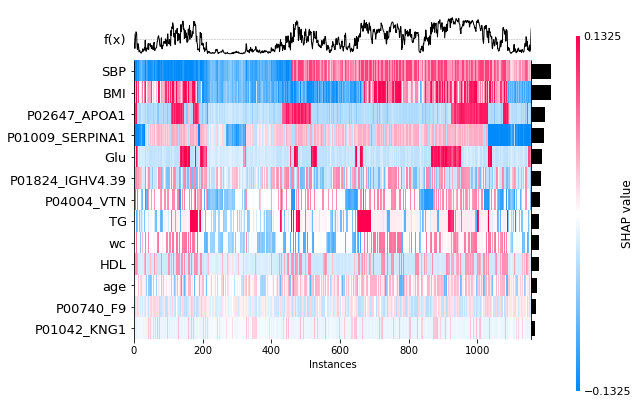

In [12]:
explainer = shap.TreeExplainer(model=combined_clf, data=df_combined_baseline[combined_features], model_output="probability" )
shap_values = explainer(df_combined_baseline[combined_features], y=df_combined_baseline["label"])
shap.plots.heatmap(shap_values, max_display=20, show=False)
plt.savefig(results_mets/"combined_shap_heatmap_baseline.pdf", bbox_inches='tight', dpi=100)

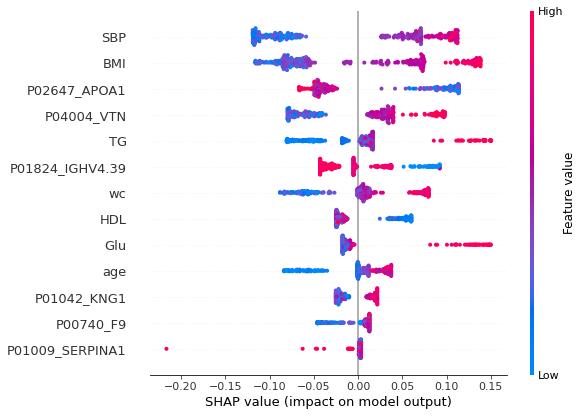

In [13]:
explainer = shap.TreeExplainer(model=combined_clf, data=df_combined_perspective[combined_features], model_output="probability" )
shap_values = explainer.shap_values(X=df_combined_perspective[combined_features], y=df_combined_perspective["label"])
shap.summary_plot(shap_values, df_combined_perspective[combined_features], show=False)
plt.savefig(results_mets/"combined_shap_sumary_perspective.pdf", bbox_inches='tight', dpi=100)

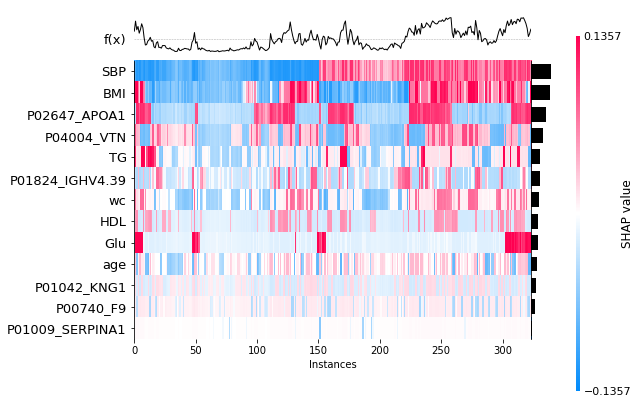

In [14]:
explainer = shap.TreeExplainer(model=combined_clf, data=df_combined_perspective[combined_features], model_output="probability")
shap_values = explainer(df_combined_perspective[combined_features], y=df_combined_perspective["label"])
shap.plots.heatmap(shap_values, max_display=20, show=False)
plt.savefig(results_mets/"combined_shap_heatmap_perspective.pdf", bbox_inches='tight', dpi=100)

In [15]:
explainer = shap.TreeExplainer(model=combined_clf, data=df_combined_base_persp[combined_features + ["sex"]], model_output="probability")
shap_values = explainer(X=df_combined_base_persp[combined_features + ["sex"]], y=df_combined_base_persp["label"])

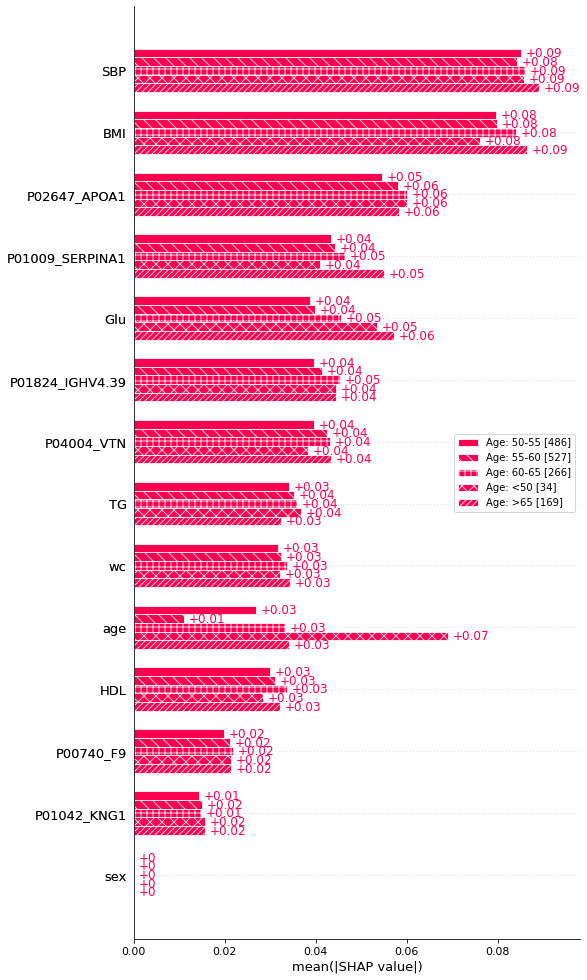

In [16]:
age = ["Age: <50" if shap_values[i,"age"].data < 50
       else "Age: 50-55" if shap_values[i,"age"].data < 55
       else "Age: 55-60" if  shap_values[i,"age"].data < 60
       else "Age: 60-65" if  shap_values[i,"age"].data < 65
       else "Age: >65" for i in range(shap_values.shape[0])]
shap.plots.bar(shap_values.cohorts(age).abs.mean(0), max_display=15, show=False)
plt.legend(loc="right")
plt.savefig(results_mets/"combined_shap_bar_age_perspective.pdf", bbox_inches='tight', dpi=100)

In [17]:
sex = ["Female" if shap_values[i,"sex"].data == 0
       else "Male" for i in range(shap_values.shape[0])]
shap.plots.bar(shap_values.cohorts(sex).abs.mean(0), max_display=15, show=False)
plt.savefig(results_mets/"combined_shap_bar_gender_perspective.pdf", bbox_inches='tight', dpi=100)

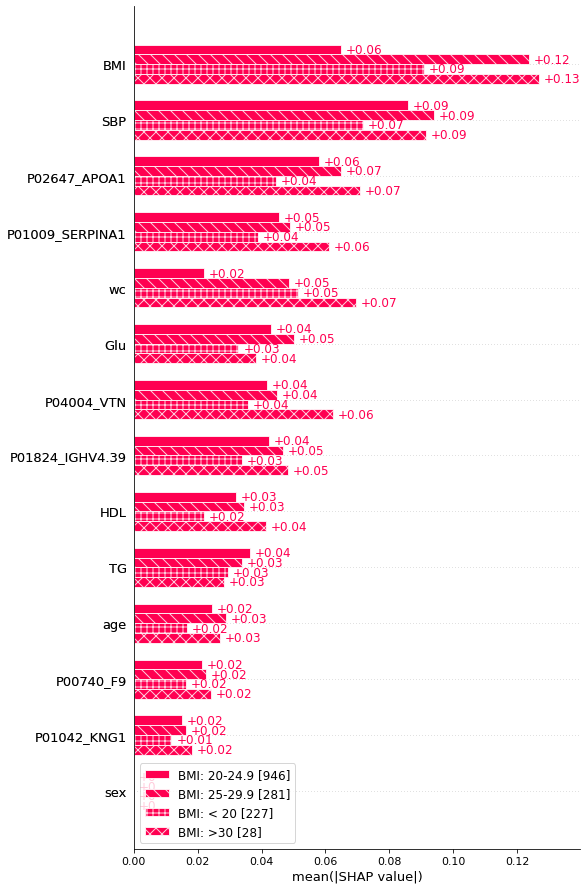

In [18]:
bmi = ["BMI: < 20" if shap_values[i, "BMI"].data < 20
       else "BMI: 20-24.9" if shap_values[i, "BMI"].data < 24.9
       else "BMI: 25-29.9" if shap_values[i, "BMI"].data < 29.9
       else "BMI: >30" for i in range(shap_values.shape[0])]
shap.plots.bar(shap_values.cohorts(bmi).abs.mean(0), max_display=15, show=False)
plt.savefig(results_mets/"combined_shap_bar_bmi_perspective.pdf", bbox_inches='tight', dpi=100)

### analysis of incorrect predicted results

In [20]:
df_incorrect_preds = pd.read_excel(root_dir/"analysis/seed_20_incorrect_predictions.xlsx",sheet_name="Sheet1", engine="openpyxl")

In [25]:
clinic_perspective = df_incorrect_preds.clinic_perspective.dropna().to_list()
combined_perspective = df_incorrect_preds.combined_perspective.dropna().to_list()

In [28]:
for i in set(combined_perspective) - set(clinic_perspective):
    print(i)

NL1803
NL1700
NL1512
NL2892
NL2464
NL1937
NL1701
NL1880
NL1838
NL1058
NL1877
NL2247
NL2371
NL2315
NL685
NL1656
NL4175
NL1976
NL1751
NL1856
NL1399
NL2206
NL4337
NL1800
NL1641
NL1282
NL18
